### Case Study 4 :  Data Science Shark Tank

***Due Date: December 7, before 11:59pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 5:59pm on Nov 15. You must CC all your group members in that email. Without this step, your project may not be approved for presentation on Dec 8.***

also NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!
 
 ![Bilby Stampede](https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg)

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

In [1]:
# Should your project presentation be like this?

# from IPython.display import YouTubeVideo
# YouTubeVideo("7a_lu7ilpnI") 

## Some Resources

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 


** APIs **
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, https://www.data.gouv.fr/fr/, https://www.oecd.org/gov/digital-government/open-government-data.htm




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the financial resources of your company?






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below** 

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

In [2]:
# write here

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import time

import re
import json
from glob import glob

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.set_option('mode.chained_assignment', None)
pd.set_option('max_colwidth', 50)

import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go

# This style emulates the look and feel of the famous data journalist Nate Silver's site.
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set()
sns.set_context("talk")

# import utils
# import kmeans
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# import lightgbm as lgb
from sklearn import metrics
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [3]:
Path_user= '../yelp_academic_dataset_user.json'
Path_reviews= '../yelp_academic_dataset_review.json'
Path_business= '../yelp_academic_dataset_business.json'

In [4]:
# The review data is too large to read in normally, so we will read it in by chunks of 1000 at a time

# Empty list to store each chunk
chunks = [] 

# Specify dtypes 
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32} 

# Store the json chunks
reader = pd.read_json(Path_reviews,
                      lines=True,
                      chunksize=1000,
                      dtype=r_dtypes,
                      orient='records')

# For loop to append each chunk into the chunks list
for chunk in reader:
        reduced_chunk = chunk.query("`date` >= '2020-12-01'")
        chunks.append(reduced_chunk)

# Concatenate each chunk into a single dataframe        
reviews = pd.concat(chunks, ignore_index=True)

In [5]:
reviews.shape

(692446, 9)

In [6]:
reviews.dtypes

review_id              object
user_id                object
business_id            object
stars                 float16
useful                  int32
funny                   int32
cool                    int32
text                   object
date           datetime64[ns]
dtype: object

In [7]:
reviews

review_id                 user_id  \
0       742gQ1wvbOY1ASV46EgsMw  _5ebIlD6-kN7jCKsKQ5xfg   
1       iBUJvIOkToh2ZECVNq5PDg  iAD32p6h32eKDVxsPHSRHA   
2       HgEofz6qEQqKYPT7YLA34w  rYvWv-Ny16b1lMcw1IP7JQ   
3       milJ7UH4Od9pBe2gWac9tA  v7i4M7NIx3bMNMChaXjU7Q   
4       Kxo5d6EOnOE-vERwQf2a1w  2ntnbUia9Bna62W0fqNcxg   
...                        ...                     ...   
692441  MIXdpbbCTRAVdi8RiMjwdg  s67G457QlHSvk5RjOMN91w   
692442  wD5ZWao_vjyT2h4xmGam8Q  7L7GL5Pi2cf8mbm2Dpw4zw   
692443  zHZ-A1qyKDEgyZMDaD--wg  _XVdmFWSgTN6YlojUxixTA   
692444  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
692445  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                   business_id  stars  useful  funny  cool  \
0       3Z59UMun90xRiSU1XX8rhQ    5.0       0      0     0   
1       YB26JvvGS2LgkxEKOObSAw    5.0       0      0     0   
2       jfIwOEXcVRyhZjM4ISOh4g    1.0       0      0     0   
3       raKflkp3CANr8N7qpQ3ZyQ    5.0       0      0     0   
4       S-VD26LE_LeJNx5nASk_pw    5.0       0      0     0   
...                        ...    ...     ...    ...   ...   
692441  58MJvmfo5hyfBbvkr54sFA    5.0       1      0     0   
692442  e_E-jq9mwm7wk75k7Yi-Xw    5.0       1      0     1   
692443  6WaI-IN8ql0xpEKlb4q8tg    5.0       1      0     0   
692444  2vLksaMmSEcGbjI5gywpZA    5.0       2      1     2   
692445  Rr9kKArrMhSLVE9a53q-aA    5.0       1      0     0   

                                                     text                date  
0       We have been ordering here for the last few ye... 2020-12-04 22:20:16  
1       I've been eating at this restaurant for over 5... 2021-01-08 01:49:36  
2       How does a delivery person from here get lost ... 2021-01-02 00:19:00  
3       I WISH I was still a Sierra resident. They're ... 2021-02-02 18:14:15  
4       The service is always good, the employees are ... 2021-01-26 18:01:45  
...                                                   ...                 ...  
692441  Great gym.  Was in Indy for 4 days on business... 2022-01-18 15:24:44  
692442  It is very rare for a restaurant to be this go... 2022-01-17 22:36:01  
692443  We redesigned my moms dress and mad it complet... 2022-01-17 20:59:01  
692444  This spot offers a great, affordable east week... 2021-03-31 16:55:10  
692445  For when I'm feeling like ignoring my calorie-... 2022-01-19 18:59:27  

[692446 rows x 9 columns]

# **Reviews-Stars**

In [8]:
review_stars = reviews['stars'].value_counts()
review_stars_percent = review_stars.apply(lambda i : i / len(reviews) * 100)
review_stars_percent

5.0    52.879936
1.0    20.369964
4.0    12.979640
3.0     7.014265
2.0     6.756195
Name: stars, dtype: float64

The number of reviews for different stars, it is clear to see that most people 65% tended to give 5-star or 4-star ratings, which means that for about 35% people were at least satisfied with their businesses. And for 1 star ratingshen, the third highest rating star was 1-star with 20% Of course, this data makes sense because most customers only write reviews when they have very positive or negative experiences

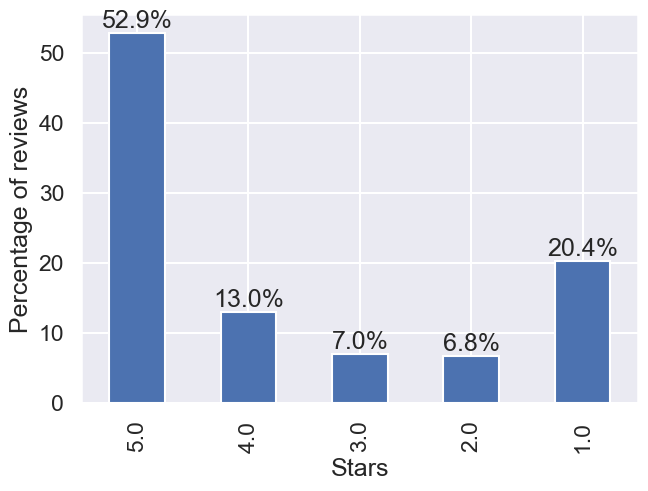

In [9]:
ax = review_stars_percent.sort_index(ascending=False).plot(kind = 'bar')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylabel('Percentage of reviews')
plt.xlabel('Stars');

In [10]:
avai_reviews = reviews.query("useful > 0 and cool > 0 and funny > 0")
print("Number of available reviews: ", len(avai_reviews))

Number of available reviews:  50219


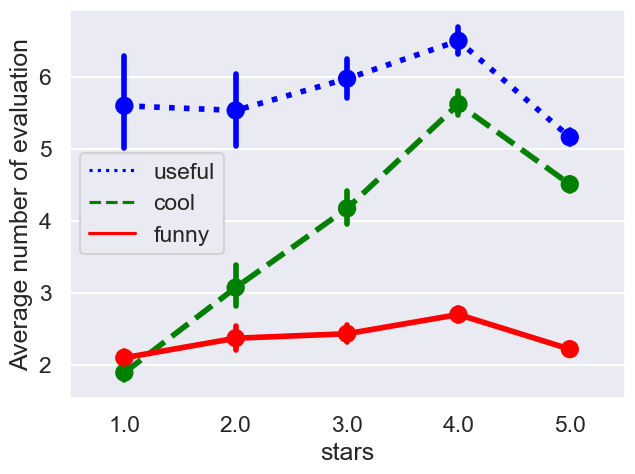

In [11]:
import matplotlib.lines as mlines
sns.pointplot(x = 'stars', y = 'useful', data = avai_reviews, color="blue", linestyles='dotted')
sns.pointplot(x = 'stars', y = 'cool', data = avai_reviews, color="green", linestyles='--')
sns.pointplot(x = 'stars', y = 'funny', data = avai_reviews, color="red")
lg1 = mlines.Line2D([], [], color='blue', label='useful', linestyle='dotted')
lg2 = mlines.Line2D([], [], color='green', label='cool', linestyle='--')
lg3 = mlines.Line2D([], [], color='red', label='funny')
plt.ylabel('Average number of evaluation')
plt.legend(handles=[lg1, lg2, lg3]);

In the plot we can see that the number of useful votes was always greater than other two.

For useful reviews, the number of 4-star votes was maximal
For funny reviews, the more stars people offered, they less votes of funny they could get.
For cool reviews, high-star reviews could get more votes.

More votes usually imply that users were more agree with those reviews. Like useful, people felt that those 4-star reviews were more helpful, or furthermore, more reliable. 
People thought extreme high-star reviews can reveal and offer more imformation about that business. While for low-star reviews, customers seemingly held a skeptical attitude, especially comparing with 4-star review.

# Cleaning Business dataset

In [12]:
business =pd.read_json(Path_business , lines=True)

In [13]:
business

business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tucson    AZ       85711   
3                           935 Race St   Philadelphia    PA       19107   
4                         101 Walnut St     Green Lane    PA       18054   
...                                 ...            ...   ...         ...   
150341                3388 Gateway Blvd       Edmonton    AB     T6J 5H2   
150342               2813 Bransford Ave      Nashville    TN       37204   
150343           6020 E 82nd St, Ste 46   Indianapolis    IN       46250   
150344                     2472 Troy Rd   Edwardsville    IL       62025   
150345            238 Apollo Beach Blvd   Apollo beach    FL       33572   

         latitude   longitude  stars  review_count  is_open  \
0       34.426679 -119.711197    5.0             7        0   
1       38.551126  -90.335695    3.0            15        1   
2       32.223236 -110.880452    3.5            22        0   
3       39.955505  -75.155564    4.0            80        1   
4       40.338183  -75.471659    4.5            13        1   
...           ...         ...    ...           ...      ...   
150341  53.468419 -113.492054    3.0            13        1   
150342  36.115118  -86.766925    4.0             5        1   
150343  39.908707  -86.065088    3.5             8        1   
150344  38.782351  -89.950558    4.0            24        1   
150345  27.771002  -82.394910    4.5             9        1   

                                               attributes  \
0                           {'ByAppointmentOnly': 'True'}   
1                  {'BusinessAcceptsCreditCards': 'True'}   
2       {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
...                                                   ...   
150341  {'ByAppointmentOnly': 'False', 'RestaurantsPri...   
150342  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
150343  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
150344  {'BusinessParking': '{'garage': False, 'street...   
150345  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                               categories  \
0       Doctors, Traditional Chinese Medicine, Naturop...   
1       Shipping Centers, Local Services, Notaries, Ma...   
2       Department Stores, Shopping, Fashion, Home & G...   
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
...                                                   ...   
150341                         Nail Salons, Beauty & Spas   
150342  Pets, Nurseries & Gardening, Pet Stores, Hobby...   
150343  Shopping, Jewelry, Piercing, Toy Stores, Beaut...   
150344  Fitness/Exercise Equipment, Eyewear & Optician...   
150345  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                    hours  
0                                                    None  
1       {'Monday': '0:0-0:0', 'Tuesday': '

In [14]:
## drop unuseful column 'neighborhood' 
business.drop(['attributes'], axis=1, inplace=True)

## remove quotation marks in name and address column
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')

## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)]
business.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [15]:
business_cats=', '.join(business['categories'].dropna())
cats=pd.DataFrame(business_cats.split(', '),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

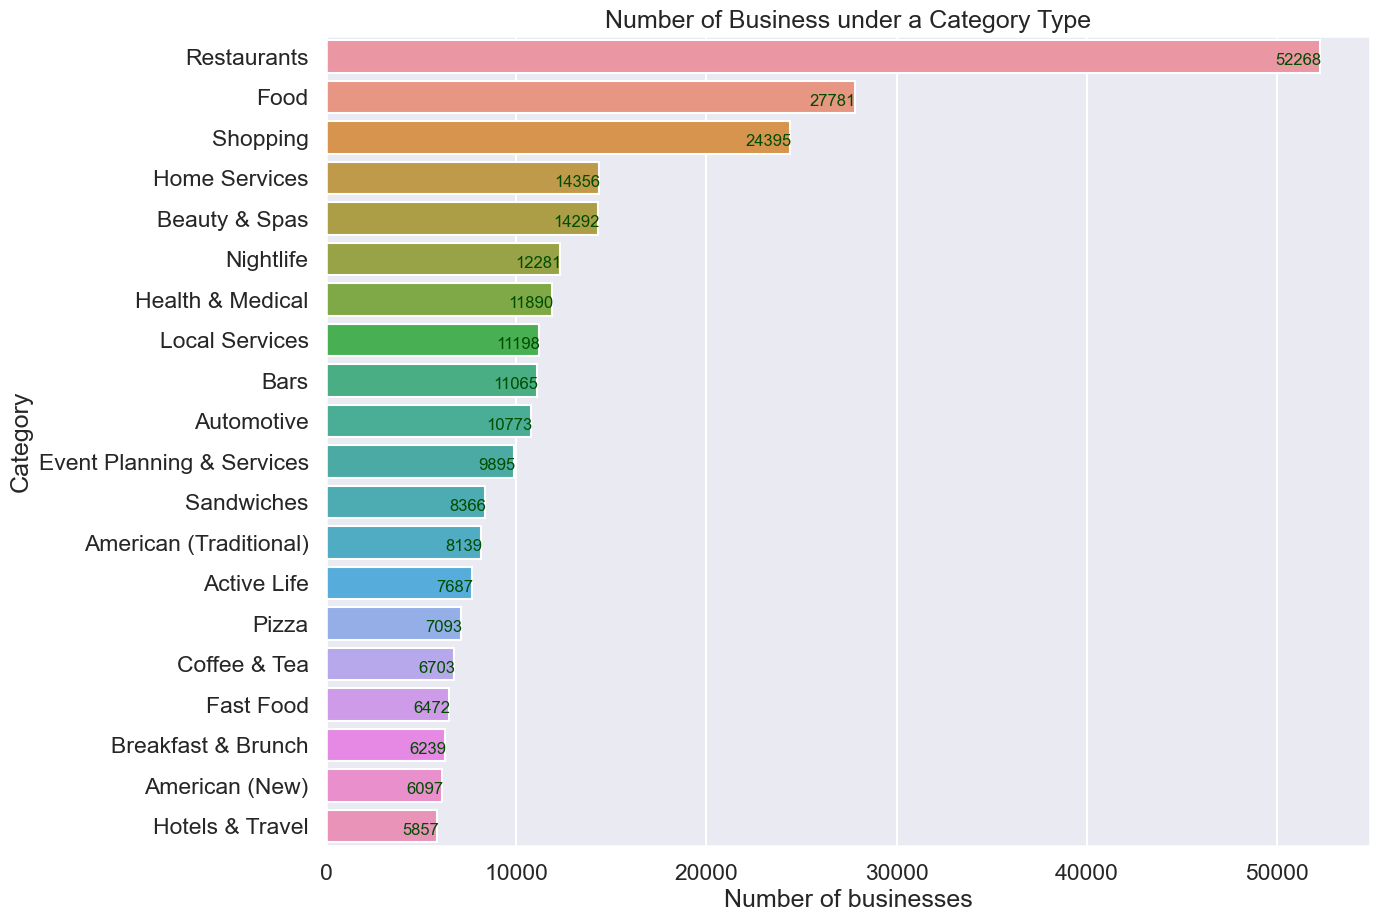

In [16]:
plt.figure(figsize=(12,10))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
ax.set_ylabel('Category')
ax.set_xlabel('Number of businesses')
ax.set_title('Number of Business under a Category Type')



for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()    

In [17]:
usa.isnull().sum()
usa= usa.dropna()

In [18]:
business= business.dropna()

In [19]:
business.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
hours           0
dtype: int64

In [20]:
## select all restaurants in USA
us_restaurants=usa[usa['categories'].str.contains('Restaurants')]

## select out 16 cuisine types of restaurants and rename the category
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants.category[:20]

3            NaN
5            NaN
9            NaN
11    Vietnamese
12      American
14       Italian
15      Japanese
19        Korean
22           NaN
23       Italian
27      Japanese
28       Italian
29           NaN
31           NaN
33           NaN
35      American
41       Italian
45       Chinese
47      American
49       Italian
Name: category, dtype: object

In [21]:
## drop null values in category, delete original column categories and reset the index

us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

business_id                                 name  \
0  eEOYSgkmpB90uNA7lDOMRA                Vietnamese Food Truck   
1  il_Ro8jwPlHresjw9EGmBg                              Denny's   
2  0bPLkL0QhhPO5kt1_EXmNQ                 Zio's Italian Market   
3  MUTTqe8uqyMdBl186RmNeA                             Tuna Bar   
4  ROeacJQwBeh05Rqg7F6TCg                                  BAP   
5  9OG5YkX1g2GReZM0AskizA              Romano's Macaroni Grill   
6  tMkwHmWFUEXrC9ZduonpTg                   The Green Pheasant   
7  QdN72BWoyFypdGJhhI5r7g                              Bar One   
8  aPNXGTDkf-4bjhyMBQxqpQ                           Craft Hall   
9  ljxNT9p0y7YMPx0fcNBGig  Tony's Restaurant & 3rd Street Cafe   

              address          city state postal_code   latitude   longitude  \
0                         Tampa Bay    FL       33602  27.955269  -82.456320   
1        8901 US 31 S  Indianapolis    IN       46227  39.637133  -86.127217   
2       2575 E Bay Dr         Largo    FL       33771  27.916116  -82.760461   
3         205 Race St  Philadelphia    PA       19106  39.953949  -75.143226   
4       1224 South St  Philadelphia    PA       19147  39.943223  -75.162568   
5  5505 S Virginia St          Reno    NV       89502  39.476117 -119.789339   
6       215 1st Ave S     Nashville    TN       37201  36.159886  -86.773197   
7        767 S 9th St  Philadelphia    PA       19147  39.939825  -75.157447   
8  901 N Delaware Ave  Philadelphia    PA       19123  39.962582  -75.135657   
9        312 Piasa St         Alton    IL       62002  38.896563  -90.186203   

   stars  review_count  is_open  \
0    4.0            10        1   
1    2.5            28        1   
2    4.5           100        0   
3    4.0           245        1   
4    4.5           205        1   
5    2.5           339        1   
6    4.0           161        0   
7    4.0            65        0   
8    3.5            65        1   
9    3.0            94        1   

                                               hours    category  
0  {'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...  Vietnamese  
1  {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...    American  
2  {'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...     Italian  
3  {'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...    Japanese  
4  {'Monday': '11:30-20:30', 'Tuesday': '11:30-20...      Korean  
5  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...     Italian  
6  {'Wednesday': '16:0-22:0', 'Thursday': '16:0-2...    Japanese  
7  {'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...     Italian  
8  {'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...    American  
9  {'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',...     Italian

In [22]:
# check total number of us restaurants
us_restaurants.shape

# check whether has duplicated business id
us_restaurants.business_id.duplicated().sum()

## check the datatype
us_restaurants.dtypes

## check missing values
us_restaurants.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
hours           0
category        0
dtype: int64

# Cleaning Review Dataset

In [23]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [24]:
# check duplicates of review_id
reviews.review_id.duplicated().sum()

0

# Merge review and business datasets

In [25]:
# merge business table and review table
restaurants_reviews = pd.merge(us_restaurants, reviews, on = 'business_id')

# update column names
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

# add column of number of words in review and label of negative and postive reviews
restaurants_reviews['num_words_review'] = restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

In [26]:
# add column of number of words in review and label of negative and postive reviews
restaurants_reviews['num_words_review'] = restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

In [27]:
# label reviews as positive or negative
restaurants_reviews['labels'] = ''
restaurants_reviews.loc[restaurants_reviews.review_star >=4, 'labels'] = 'positive'
restaurants_reviews.loc[restaurants_reviews.review_star ==3, 'labels'] = 'neural'
restaurants_reviews.loc[restaurants_reviews.review_star <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
restaurants_reviews.drop(restaurants_reviews[restaurants_reviews['labels'] =='neural'].index, axis=0, inplace=True)
restaurants_reviews.reset_index(drop=True, inplace=True)

restaurants_reviews.head()

business_id                   name       address          city  \
0  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck                   Tampa Bay   
1  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck                   Tampa Bay   
2  il_Ro8jwPlHresjw9EGmBg                Denny's  8901 US 31 S  Indianapolis   
3  il_Ro8jwPlHresjw9EGmBg                Denny's  8901 US 31 S  Indianapolis   
4  il_Ro8jwPlHresjw9EGmBg                Denny's  8901 US 31 S  Indianapolis   

  state postal_code   latitude  longitude  avg_star  review_count  is_open  \
0    FL       33602  27.955269 -82.456320       4.0            10        1   
1    FL       33602  27.955269 -82.456320       4.0            10        1   
2    IN       46227  39.637133 -86.127217       2.5            28        1   
3    IN       46227  39.637133 -86.127217       2.5            28        1   
4    IN       46227  39.637133 -86.127217       2.5            28        1   

                                               hours    category  \
0  {'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...  Vietnamese   
1  {'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...  Vietnamese   
2  {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...    American   
3  {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...    American   
4  {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...    American   

                review_id                 user_id  review_star  useful  funny  \
0  x9Vsx5gGtUi-LZwk-BREKQ  01cQC-PaQb-cqbRAvwJU-A          5.0       0      0   
1  CE36Dcxv60ibaHntpm94zg  qjfMBIZpQT9DDtw_BWCopQ          5.0      18      2   
2  i_ErGQkWb9o8Yr59PvJFMw  7ahDVjzGcAcRxdsx4AGUzA          4.0       1      0   
3  XjYTEIrgqwXdCtc-JMaADQ  WjQBeRnBKgqGIoIsmn37Cg          1.0       0      0   
4  hiB10SbNGTG8zgUiwBPoiQ  UBYO9lnBRa6OGRvdekEyZQ          1.0       0      0   

   cool                                               text  \
0     0  I have traveled to Vietnam several times, love...   
1    14  Vietnamese Food Truck was a super perfect dinn...   
2     1  Ok I know!! It's DENNY"S!! ("Lenny's! LOL! Sho...   
3     0  If you want bad service and an assistant manag...   
4     0  I went there with my uncle and grandma on Sund...   

                 date  num_words_review    labels  
0 2022-01-03 01:18:29               115  positive  
1 2021-12-01 00:06:58               177  positive  
2 2021-01-29 00:03:33                93  positive  
3 2021-04-01 02:45:09                56  negative  
4 2021-03-09 09:42:28                80  negative

# Exploratory Data Analysis
Restaurants Distribution

Distribution of restaurants in each category

In [28]:
plt.style.use('ggplot')

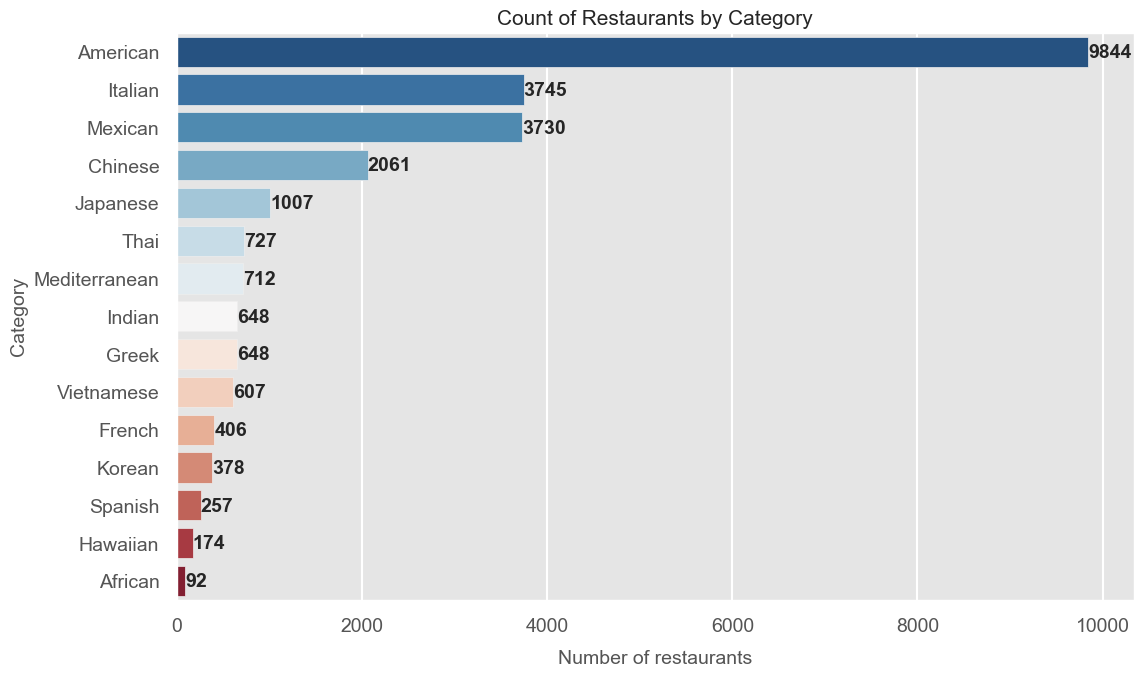

In [29]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

Categories in dark blue color have the largest number of restaurants. On the contrary, categories in dark red color have the least number of restaurants. The top 5 type of restaurants are American, Mexican, Italian, Chinese and Japanese.

# Top 10 cities with most restaurants

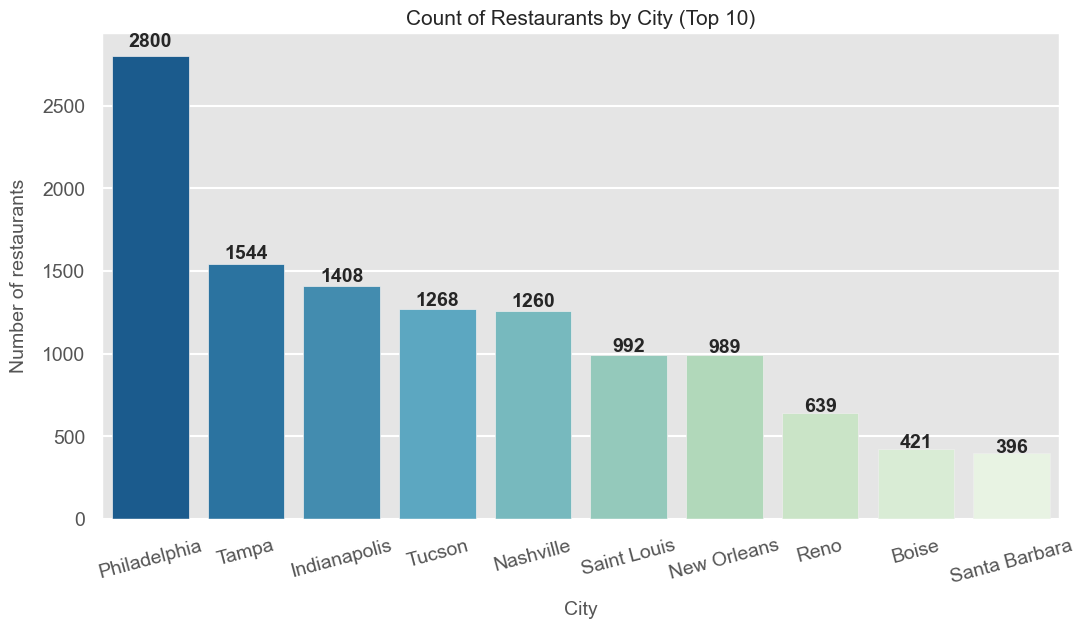

In [30]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.city.value_counts()[:10]
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# Distribution of restaurants in each state

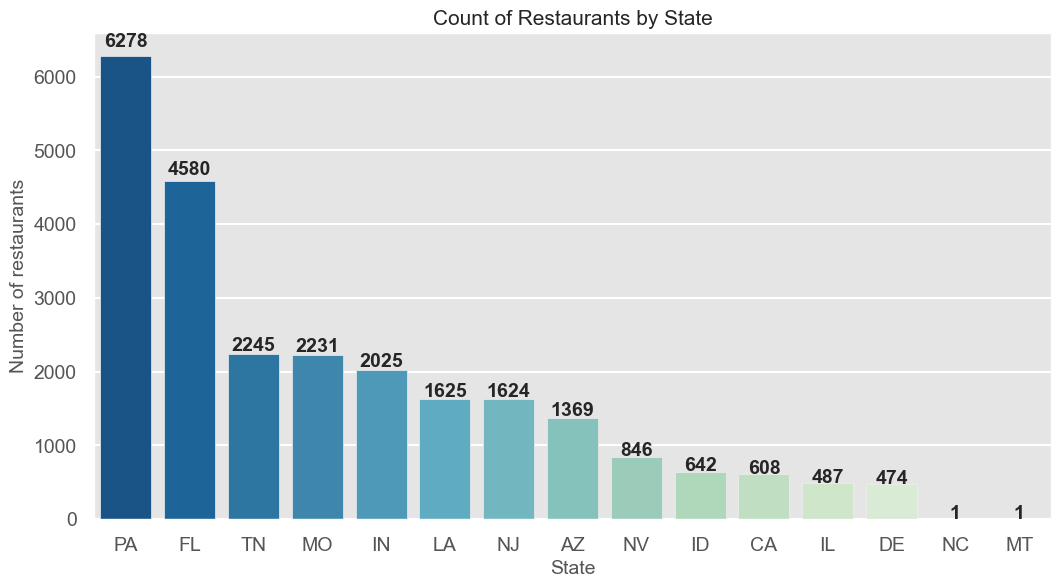

In [31]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.state.value_counts()
sns.barplot(x=grouped.index, y=grouped.values,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

# Reviews Distribution

Distribution of reviews by cuisine type

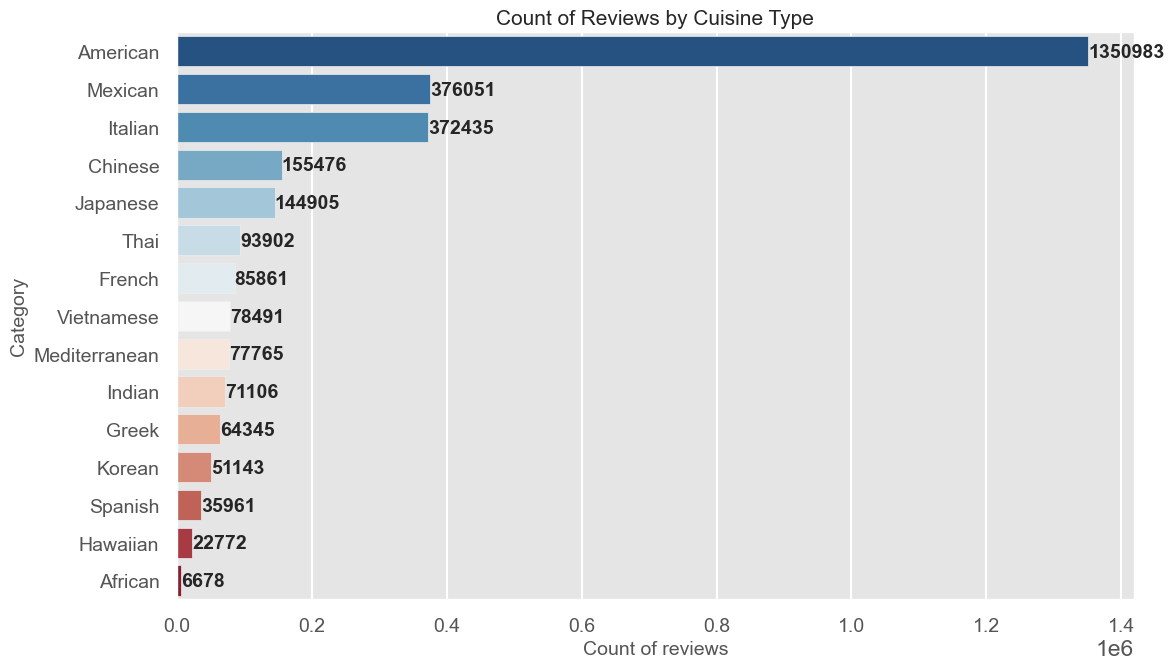

In [32]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

# Top 10 cities with most reviews

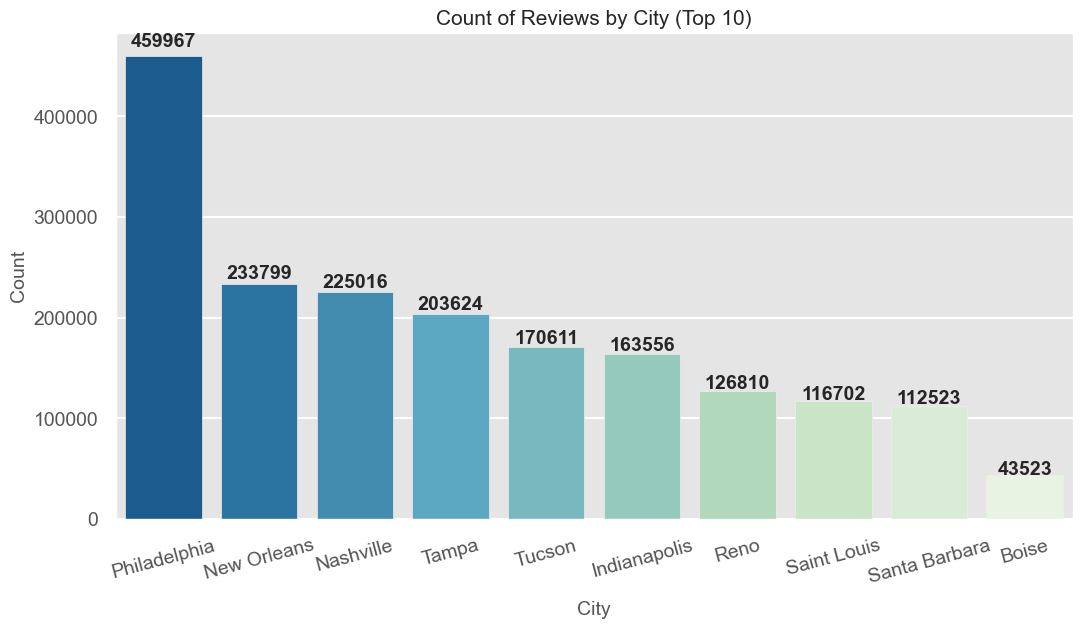

In [33]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# Top 9 restaurants with most reviews

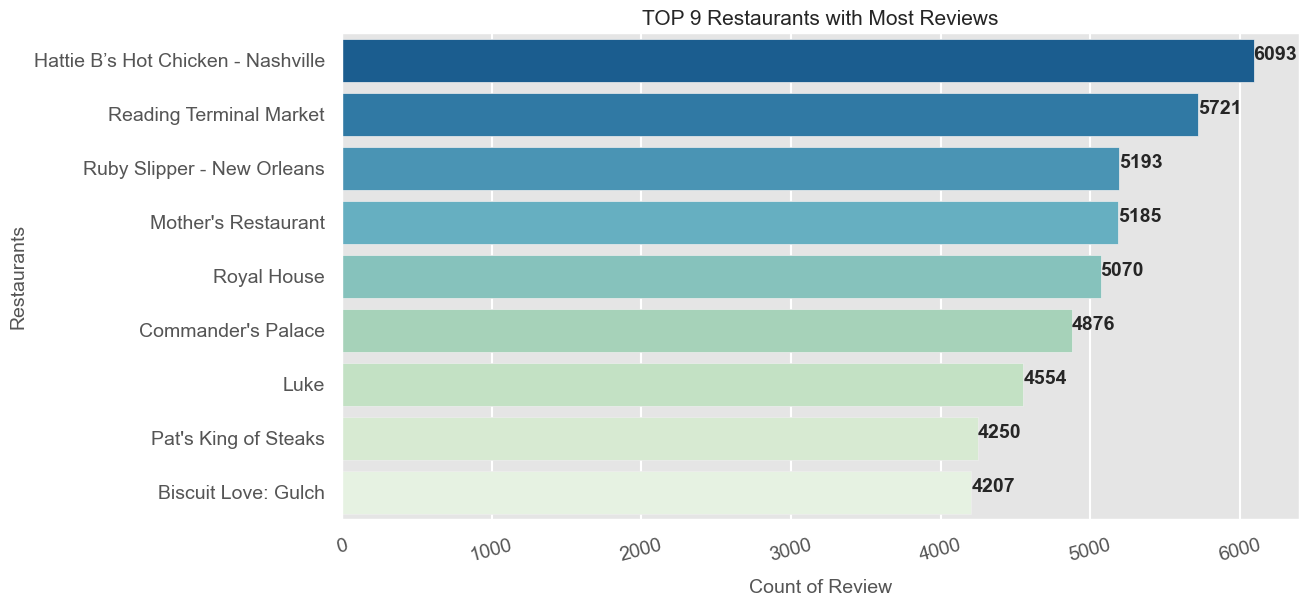

In [34]:
plt.figure(figsize=(11,6))
grouped = us_restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


In [35]:
# write here

# Classifier

In [36]:
reviews_extremestars = reviews[reviews['stars'] != 3]
reviews_extremestars.shape

(643876, 9)

In [37]:
reviews_extremestars['high'] = reviews_extremestars['stars'].apply(lambda i : 1 if i > 3 else 0)
reviews_extremestars = reviews_extremestars[['review_id', 'stars', 'text', 'high']]
reviews_extremestars.head()

review_id  stars  \
0  742gQ1wvbOY1ASV46EgsMw    5.0   
1  iBUJvIOkToh2ZECVNq5PDg    5.0   
2  HgEofz6qEQqKYPT7YLA34w    1.0   
3  milJ7UH4Od9pBe2gWac9tA    5.0   
4  Kxo5d6EOnOE-vERwQf2a1w    5.0   

                                                text  high  
0  We have been ordering here for the last few ye...     1  
1  I've been eating at this restaurant for over 5...     1  
2  How does a delivery person from here get lost ...     0  
3  I WISH I was still a Sierra resident. They're ...     1  
4  The service is always good, the employees are ...     1

In [38]:
[train, test] = train_test_split(reviews_extremestars, test_size=0.1, random_state=42)
test.shape

(64388, 4)

In [39]:
def words_in_texts(words, texts):
    return 1 * np.array([texts.str.contains(word) for word in words]).T

In [40]:
def predict(keywords):
    Phi_train = words_in_texts(keywords, train['text'])
    Y_train = train['high']
    
    lr = sklearn.linear_model.LogisticRegression(fit_intercept=True)
    lr.fit(Phi_train, Y_train)

    training_accuracy = sum(lr.predict(Phi_train) == Y_train) / len(Y_train)
    return training_accuracy 


In [41]:
keywords1 = ['bland', 'awesome', 'love', 'omg', 'delicious']

predict(keywords1)

0.7124651416422774

In [42]:
train['high'].sum() / len(train)

0.7081182008945828

In [43]:
keywords2 = ['recommended', 'excellent', 'appointment', 'exceptional', 'absolutely', 'highly', 
             'amazing', 'thanks', 'best', 'love', 'courteous', 'accommodating',
             'heaven', 'incredible', 'bomb','security', 'worst', 'refund', 
             'awful', 'refused','zero', 'unprofessional', 'rude', 'manager', 
             'upset', 'driver', 'worse', 'horrible', 'terrible', 'disgusting']

predict(keywords2)

0.8140220332431388

# Business

In [44]:
business = pd.read_json(Path_business , lines = True)

In [45]:
business = business[['business_id', 'name', 'is_open', 'stars', 'review_count', 'categories', 'attributes', 'state', 'city', 'latitude', 'longitude']]
business.head()

business_id                      name  is_open  stars  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ        0    5.0   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store        1    3.0   
2  tUFrWirKiKi_TAnsVWINQQ                    Target        0    3.5   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries        1    4.0   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery        1    4.5   

   review_count                                         categories  \
0             7  Doctors, Traditional Chinese Medicine, Naturop...   
1            15  Shipping Centers, Local Services, Notaries, Ma...   
2            22  Department Stores, Shopping, Fashion, Home & G...   
3            80  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4            13                          Brewpubs, Breweries, Food   

                                          attributes state           city  \
0                      {'ByAppointmentOnly': 'True'}    CA  Santa Barbara   
1             {'BusinessAcceptsCreditCards': 'True'}    MO         Affton   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...    AZ         Tucson   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...    PA   Philadelphia   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...    PA     Green Lane   

    latitude   longitude  
0  34.426679 -119.711197  
1  38.551126  -90.335695  
2  32.223236 -110.880452  
3  39.955505  -75.155564  
4  40.338183  -75.471659

In [46]:
business_none = business.dropna()

In [47]:
# Get all the restaurants in Philadelphia

business_none['restaurant'] = business_none['categories'].apply(lambda c : 'Restaurants' in c)
Phili_rest = business_none.query("city == 'Philadelphia' and restaurant == True")
print("Number of restaurants in Philadelphia: ", len(Phili_rest))

Number of restaurants in Philadelphia:  5799


In [48]:
Phi = Phili_rest[Phili_rest['review_count'] > 50][['name', 'stars', 'categories']]
Phi

name  stars  \
3              St Honore Pastries    4.0   
15                       Tuna Bar    4.0   
19                            BAP    4.5   
28                        Bar One    4.0   
35                     Craft Hall    3.5   
...                           ...    ...   
150037       Luigi’s Pizza Fresca    4.0   
150060       Mugshots Coffeehouse    4.0   
150085  Spuntino Wood Fired Pizza    4.5   
150178             Stina Pizzeria    4.5   
150306               PrimoHoagies    3.0   

                                               categories  
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
15                      Sushi Bars, Restaurants, Japanese  
19                                    Korean, Restaurants  
28      Cocktail Bars, Bars, Italian, Nightlife, Resta...  
35      Eatertainment, Arts & Entertainment, Brewpubs,...  
...                                                   ...  
150037              Italian, Pizza, Restaurants, Hawaiian  
150060  Restaurants, Music Venues, Arts & Entertainmen...  
150085                                 Pizza, Restaurants  
150178                  Pizza, Restaurants, Mediterranean  
150306  Restaurants, Specialty Food, Food, Sandwiches,...  

[2538 rows x 3 columns]

In [49]:
Phi['categories'][150306]

'Restaurants, Specialty Food, Food, Sandwiches, Italian'

In [50]:
def rest_categories_city(l):
    d = {}
    for row in l.index:
        stars = l.loc[row, ]['stars']
        for c in l.loc[row, ]['categories']:
            if c != 'Restaurants':
                if c not in d.keys():
                    d[c] = [stars]
                else:
                    d[c].append(stars)
    # print(d)
    rest_categories = pd.DataFrame({'stars':list(d.values())})
    rest_categories.index = d.keys()
    rest_categories['number'] = rest_categories['stars'].apply(lambda a : len(a))
    rest_categories['percentage'] = rest_categories['number'] / len(l) * 100
    rest_categories['average_stars'] = rest_categories['stars'].apply(lambda a : sum(a) / len(a))
    rest_categories = rest_categories.drop(['stars'], axis=1)
    
    return rest_categories

In [51]:
Phi['categories']=Phi['categories'].apply(lambda x: x.split(','))

In [52]:
rest_from_lasvegas = rest_categories_city(Phi)
rest_from_lasvegas['city'] = 'Philadelphia'
top10_rest_from_lasvegas = rest_from_lasvegas.sort_values('number', ascending = False).head(10)
top10_rest_from_lasvegas

number  percentage  average_stars          city
 Restaurants               1892   74.546887       3.736258  Philadelphia
 Food                       683   26.910954       3.879941  Philadelphia
 Bars                       565   22.261623       3.631858  Philadelphia
 Nightlife                  547   21.552403       3.619744  Philadelphia
 American (New)             380   14.972419       3.709211  Philadelphia
 Sandwiches                 333   13.120567       3.753754  Philadelphia
 Breakfast & Brunch         300   11.820331       3.836667  Philadelphia
 American (Traditional)     291   11.465721       3.541237  Philadelphia
 Coffee & Tea               216    8.510638       3.879630  Philadelphia
 Italian                    210    8.274232       3.795238  Philadelphia

In [53]:
rest_from_lasvegas

number  percentage  average_stars          city
 Food                      683   26.910954       3.879941  Philadelphia
 Bubble Tea                 30    1.182033       4.066667  Philadelphia
 Coffee & Tea              216    8.510638       3.879630  Philadelphia
 Bakeries                   96    3.782506       3.958333  Philadelphia
Sushi Bars                  29    1.142632       3.724138  Philadelphia
...                        ...         ...            ...           ...
 Champagne Bars              1    0.039401       4.000000  Philadelphia
Furniture Reupholstery       1    0.039401       2.000000  Philadelphia
Pop-Up Restaurants           1    0.039401       3.000000  Philadelphia
Books                        1    0.039401       4.500000  Philadelphia
 Vinyl Records               1    0.039401       4.500000  Philadelphia

[478 rows x 4 columns]

In [54]:
top5_stars_from_lasvegas = rest_from_lasvegas[rest_from_lasvegas['number'] >= 10]\
                            .sort_values('average_stars', ascending = False).head()
top5_stars_from_lasvegas

number  percentage  average_stars          city
 Street Vendors       13    0.512214       4.461538  Philadelphia
Korean                10    0.394011       4.250000  Philadelphia
 Poke                 10    0.394011       4.250000  Philadelphia
 Modern European      17    0.669819       4.235294  Philadelphia
Delis                 13    0.512214       4.230769  Philadelphia

In [55]:
business_none['categories']=business_none['categories'].apply(lambda x: x.split(','))

In [56]:
p = business_none.query("city == 'Nashville' and restaurant == True")
p = p[p['review_count'] > 50][['name', 'stars', 'categories']]
rest_from_phoenix = rest_categories_city(p)
rest_from_phoenix['city'] = 'Nashville'
top10_rest_from_phoenix = rest_from_phoenix.sort_values('number', ascending = False).head(10) # Top10 in Phoenix

t = business_none.query("city == 'Saint Petersburg' and restaurant == True")
t = t[t['review_count'] > 50][['name', 'stars', 'categories']]
rest_from_toronto = rest_categories_city(t)
rest_from_toronto['city'] = 'Saint Petersburg'
top10_rest_from_toronto = rest_from_toronto.sort_values('number', ascending = False).head(10) # Top10 in Toronto

d1 = top10_rest_from_lasvegas.append(top10_rest_from_phoenix)
three_cities_top10 = d1.append(top10_rest_from_toronto)

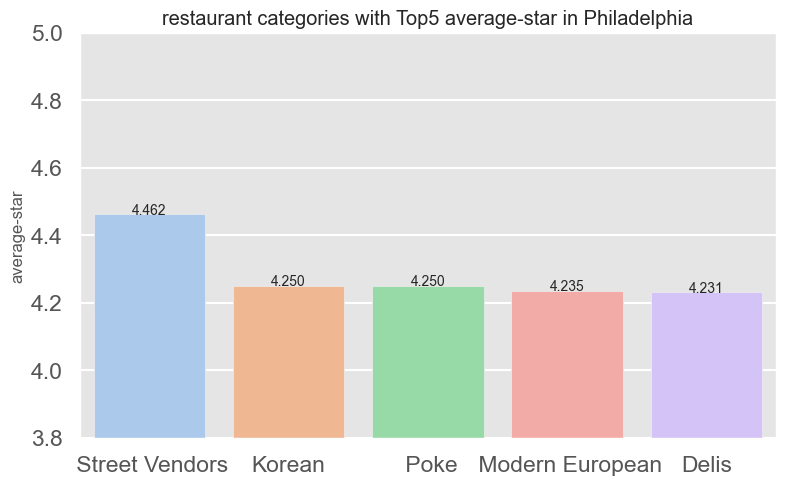

In [57]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(y = 'average_stars', x = top5_stars_from_lasvegas.index, data = top5_stars_from_lasvegas, palette="pastel")
plt.ylabel('average-star')
plt.ylim([3.8, 5.0])
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center')
plt.title('restaurant categories with Top5 average-star in Philadelphia');

# Vegan Restaurants

In [58]:
reviews.head()

review_id                 user_id             business_id  \
0  742gQ1wvbOY1ASV46EgsMw  _5ebIlD6-kN7jCKsKQ5xfg  3Z59UMun90xRiSU1XX8rhQ   
1  iBUJvIOkToh2ZECVNq5PDg  iAD32p6h32eKDVxsPHSRHA  YB26JvvGS2LgkxEKOObSAw   
2  HgEofz6qEQqKYPT7YLA34w  rYvWv-Ny16b1lMcw1IP7JQ  jfIwOEXcVRyhZjM4ISOh4g   
3  milJ7UH4Od9pBe2gWac9tA  v7i4M7NIx3bMNMChaXjU7Q  raKflkp3CANr8N7qpQ3ZyQ   
4  Kxo5d6EOnOE-vERwQf2a1w  2ntnbUia9Bna62W0fqNcxg  S-VD26LE_LeJNx5nASk_pw   

   stars  useful  funny  cool  \
0    5.0       0      0     0   
1    5.0       0      0     0   
2    1.0       0      0     0   
3    5.0       0      0     0   
4    5.0       0      0     0   

                                                text                date  
0  We have been ordering here for the last few ye... 2020-12-04 22:20:16  
1  I've been eating at this restaurant for over 5... 2021-01-08 01:49:36  
2  How does a delivery person from here get lost ... 2021-01-02 00:19:00  
3  I WISH I was still a Sierra resident. They're ... 2021-02-02 18:14:15  
4  The service is always good, the employees are ... 2021-01-26 18:01:45

In [59]:
business_none['vegan'] = business_none['categories'].apply(lambda c : 'Vegan' in c)
reviews['month'] = reviews['date'].dt.month
rests = business_none[(business_none['restaurant'] == True) & (business_none['is_open'] == 1)]

# We only use the data exists in both reviews dataframe and business dataframe. 
rests_with_reviews = reviews.merge(rests, left_on='business_id', right_on='business_id')

In [60]:
rests_with_reviews.head()

review_id                 user_id             business_id  \
0  742gQ1wvbOY1ASV46EgsMw  _5ebIlD6-kN7jCKsKQ5xfg  3Z59UMun90xRiSU1XX8rhQ   
1  T_OqhWm0f1jCwN1y9Wdsuw  87uwPLEX_gRsUwIodgbEug  3Z59UMun90xRiSU1XX8rhQ   
2  L4VlZVoXqPiuRruqcS3sTA  InEawhtZLPFbcnCyNlXwTA  3Z59UMun90xRiSU1XX8rhQ   
3  iBUJvIOkToh2ZECVNq5PDg  iAD32p6h32eKDVxsPHSRHA  YB26JvvGS2LgkxEKOObSAw   
4  4cUIWac8iktDG8z-vnb5dQ  xsyrVqW4GJGo6cGMqod7uA  YB26JvvGS2LgkxEKOObSAw   

   stars_x  useful  funny  cool  \
0      5.0       0      0     0   
1      5.0       0      0     0   
2      5.0       0      0     0   
3      5.0       0      0     0   
4      5.0       0      0     1   

                                                text                date  \
0  We have been ordering here for the last few ye... 2020-12-04 22:20:16   
1  By far the best Chinese restaurant in Warminst... 2021-01-18 17:06:40   
2  Best sushi ever, best Chinese food ever, most ... 2021-08-24 00:28:29   
3  I've been eating at this restaurant for over 5... 2021-01-08 01:49:36   
4  We love this place. We come often. It's a nice... 2021-07-09 17:51:00   

   month             name  is_open  stars_y  review_count  \
0     12  Asian Taste Inn        1      4.0            61   
1      1  Asian Taste Inn        1      4.0            61   
2      8  Asian Taste Inn        1      4.0            61   
3      1    Unagi & Sushi        1      4.0            62   
4      7    Unagi & Sushi        1      4.0            62   

                              categories  \
0    [Food,  Restaurants,  Asian Fusion]   
1    [Food,  Restaurants,  Asian Fusion]   
2    [Food,  Restaurants,  Asian Fusion]   
3  [Sushi Bars,  Restaurants,  Japanese]   
4  [Sushi Bars,  Restaurants,  Japanese]   

                                          attributes state               city  \
0  {'RestaurantsAttire': 'u'casual'', 'Restaurant...    PA  Huntingdon Valley   
1  {'RestaurantsAttire': 'u'casual'', 'Restaurant...    PA  Huntingdon Valley   
2  {'RestaurantsAttire': 'u'casual'', 'Restaurant...    PA  Huntingdon Valley   
3  {'Alcohol': 'u'beer_and_wine'', 'Caters': 'Fal...    LA           Metairie   
4  {'Alcohol': 'u'beer_and_wine'', 'Caters': 'Fal...    LA           Metairie   

    latitude  longitude  restaurant  vegan  
0  40.170447 -75.073694        True  False  
1  40.170447 -75.073694        True  False  
2  40.170447 -75.073694        True  False  
3  29.974478 -90.150370        True  False  
4  29.974478 -90.150370        True  False

In [61]:
vegan_pect = rests_with_reviews.groupby(['month']).mean()
vegan_pect.reset_index(inplace = True)
vegan_pect['vegan'] = vegan_pect['vegan'] * 100

In [62]:
vegan_pect

month   stars_x    useful     funny      cool  is_open   stars_y  \
0       1  3.904643  0.827976  0.212772  0.517310      1.0  3.909087   
1       2  3.917233  0.927997  0.230845  0.550238      1.0  3.911560   
2       3  3.843051  0.878127  0.227186  0.511701      1.0  3.893551   
3       4  3.809551  0.863419  0.209853  0.481943      1.0  3.893988   
4       5  3.782898  0.908792  0.231420  0.509487      1.0  3.891971   
5       6  3.836115  0.876066  0.225348  0.491496      1.0  3.902347   
6       7  3.801790  0.799324  0.208938  0.462287      1.0  3.907110   
7       8  3.787933  0.769720  0.206372  0.438468      1.0  3.894077   
8       9  3.758753  0.760581  0.203054  0.467495      1.0  3.884794   
9      10  3.793772  0.698272  0.184101  0.422276      1.0  3.891774   
10     11  3.798388  0.798623  0.219473  0.529528      1.0  3.901695   
11     12  3.864559  0.869972  0.220264  0.534990      1.0  3.895893   

    review_count   latitude  longitude  restaurant     vegan  
0     385.291266  35.186044 -89.807300         1.0  0.405861  
1     382.754100  35.056306 -90.291223         1.0  0.465471  
2     417.246277  34.917290 -90.121761         1.0  0.408257  
3     422.935561  34.965124 -90.178035         1.0  0.425729  
4     422.795183  35.072978 -89.797640         1.0  0.396093  
5     439.704896  35.132085 -89.897911         1.0  0.376199  
6     430.977248  35.318708 -90.025104         1.0  0.404200  
7     399.501389  35.644342 -89.902144         1.0  0.445704  
8     368.836832  35.951724 -89.955958         1.0  0.341979  
9     386.974517  35.571752 -89.690658         1.0  0.344956  
10    412.192681  35.499232 -90.359857         1.0  0.298808  
11    392.032602  35.299553 -89.766918         1.0  0.418944

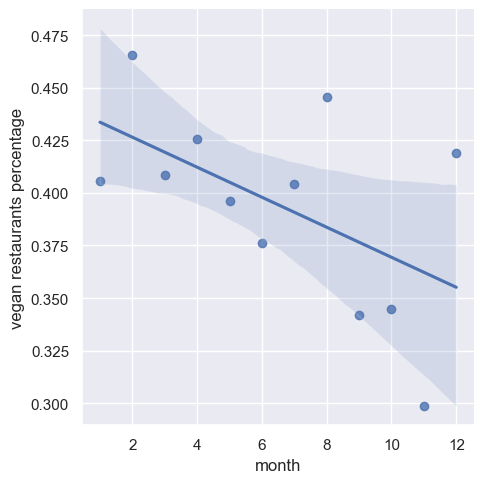

In [63]:
sns.set(color_codes=True)
sns.lmplot(x = 'month', y = 'vegan', data = vegan_pect)
plt.ylabel('vegan restaurants percentage');

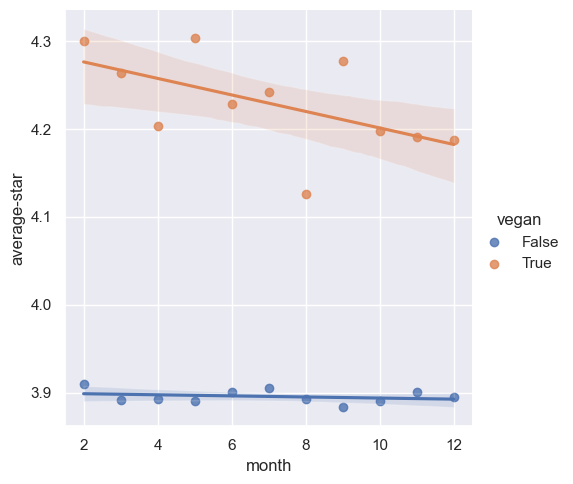

In [64]:
vegan_stars = rests_with_reviews.groupby(['month', 'vegan']).mean().reset_index().loc[2:, ]

sns.lmplot(x = 'month', y = 'stars_y', hue = 'vegan', data = vegan_stars) 
plt.ylabel('average-star');

# SENTIMENT ANALYSIS

In [65]:
df_reviews = reviews[['text', 'stars']]
df_reviews.head()

text  stars
0  We have been ordering here for the last few ye...    5.0
1  I've been eating at this restaurant for over 5...    5.0
2  How does a delivery person from here get lost ...    1.0
3  I WISH I was still a Sierra resident. They're ...    5.0
4  The service is always good, the employees are ...    5.0

In [66]:
df_reviews.isna().mean()

text     0.0
stars    0.0
dtype: float64

In [67]:
df_reviews=df_reviews[df_reviews.stars != 3]

pd.set_option('mode.chained_assignment', None)
df_reviews["labels"] = df_reviews["stars"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
df_reviews = df_reviews.drop("stars",axis=1)

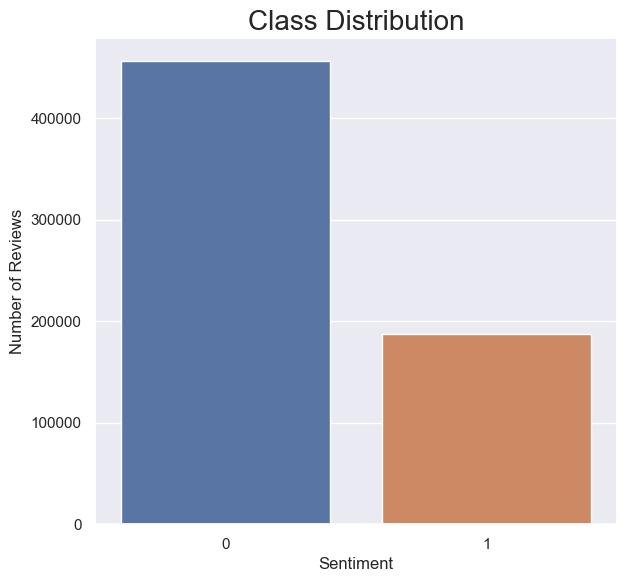

In [68]:
label_count = df_reviews['labels'].value_counts()
label_count = label_count.sort_index()

fig = plt.figure(figsize=(6, 6))
ax = sns.barplot(x=label_count.index, y=label_count.values)
plt.title("Class Distribution",fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xlabel('Sentiment', fontsize = 12);

In [69]:
print("{:.2f}".format(df_reviews[df_reviews.labels == 0].shape[0]/df_reviews.shape[0]))

0.71


In [70]:
train, test = train_test_split(df_reviews, test_size = 0.3, stratify = df_reviews['labels'], random_state = 42)

In [71]:
punct = set(string.punctuation)

In [72]:
def text_prep(text):
    #clean text
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    #remove non-letters and lower case
    text = re.sub('[^a-z\s]', '', text.lower())
    
    #remove punctuation        
    punc_removed = [char for char in text if char not in punct]
    punc_removed = ''.join(punc_removed)
    
    return [word for word in punc_removed.split()]

In [73]:
start_time = time.time()
cv= CountVectorizer(binary=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv.fit_transform(train['text'].values)
train_feature_set=cv.transform(train['text'].values)
test_feature_set=cv.transform(test['text'].values)
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  0.82  mins


In [74]:
train_feature_set.shape[1]

29657

In [75]:
cv.vocabulary_['tasty']

26011

In [76]:
y_train = train['labels'].values
y_test = test['labels'].values

In [77]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)

print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to train model and make predictions:  0.62  mins


In [78]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.964
F1:  0.938


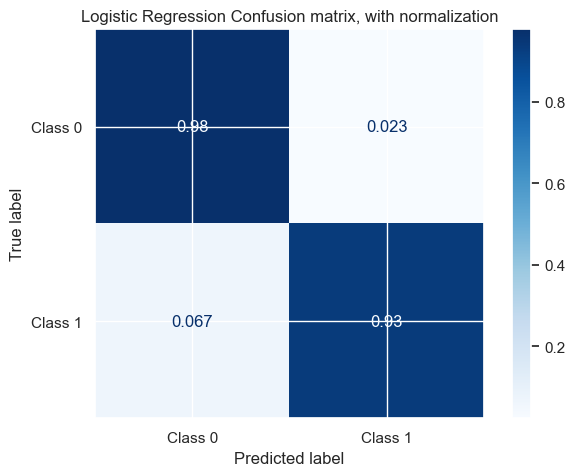

In [79]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [80]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  a Score:  -0.025620831418762223
Feature:  aa Score:  0.20589882860594147
Feature:  aaa Score:  -0.6092023028609491
Feature:  aad Score:  -0.13987897422169446
Feature:  aai Score:  -0.2590168316396467
Feature:  aamco Score:  0.1376147773208177
Feature:  aaron Score:  -0.541541964445606
Feature:  ab Score:  0.74591780586204
Feature:  aback Score:  0.2674208307931895
Feature:  abalone Score:  0.2361100090309565


In [81]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)

In [82]:
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['poisoning', 'unremarkable', 'slowest', 'worst', 'mediocre', 'unprofessional', 'subpar', 'unimpressed', 'rudest', 'tasteless']


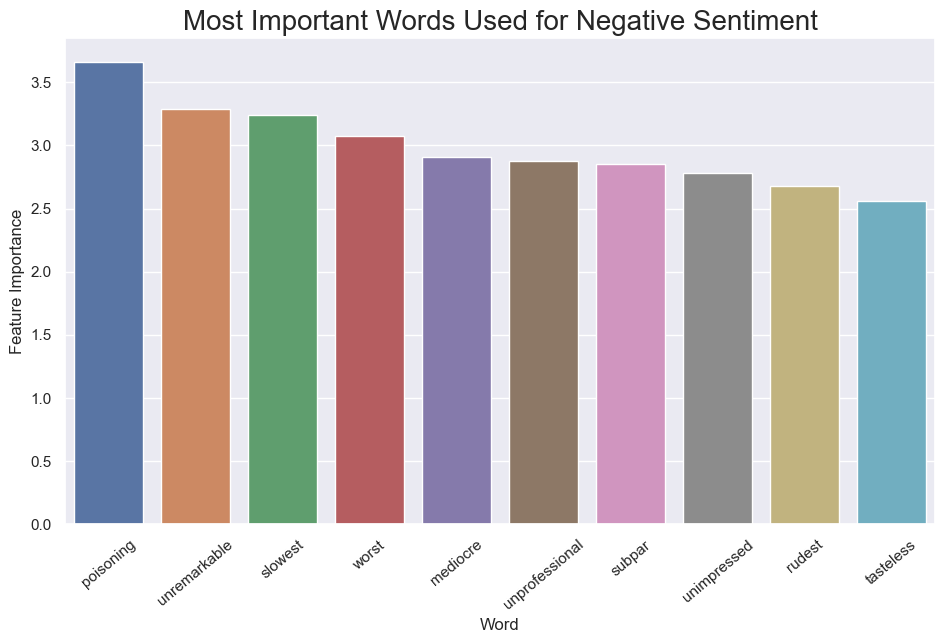

In [83]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y=feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [84]:
sub_poi = train.loc[train.text.str.contains('poisoning')]
round(sub_poi.labels.mean(),3)

0.952

In [85]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['pleasantly', 'perfection', 'reasonably', 'phenomenal', 'downside', 'delicious', 'hesitate', 'delish', 'gem', 'disappoint']


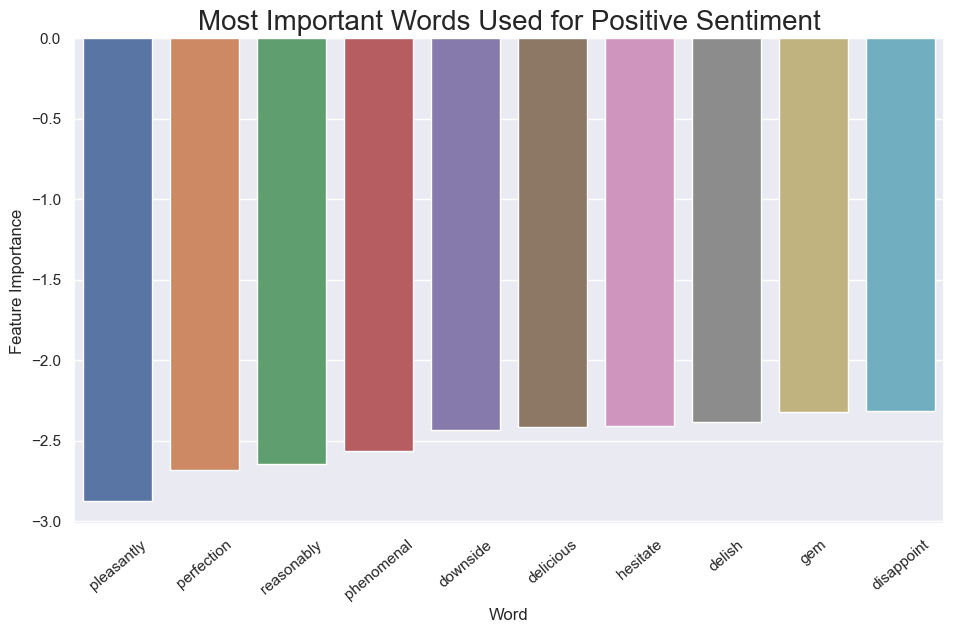

In [86]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [87]:
test_review = cv.transform(["I did not enjoy the food or the service"])
lr.predict_proba(test_review)

array([[0.44798828, 0.55201172]])

In [88]:
test_review = cv.transform(["I loved the food. Excellent service"])
lr.predict_proba(test_review)

array([[0.98832231, 0.01167769]])

In [89]:
pred_proba_df = pd.DataFrame(lr.predict_proba(test_feature_set))
threshold_list = [0.3,0.4,0.45,0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_f1 = round(metrics.f1_score(y_test, Y_test_pred.loc[:,1].values),3)
    print('F1: {}'.format(test_f1))


******** For i = 0.3 ******
F1: 0.936

******** For i = 0.4 ******
F1: 0.939

******** For i = 0.45 ******
F1: 0.939

******** For i = 0.5 ******
F1: 0.938


# Light GBM

In [90]:
# start_time = time.time()
# clf = lgb.LGBMClassifier(n_estimators=1000)
# clf.fit(train_feature_set.astype('float32'),y_train.astype('float32'))
# y_pred = clf.predict(test_feature_set.astype('float32'))

# print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

In [91]:
# print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
# print("F1: ",round(metrics.f1_score(y_test, y_pred),3))
# print("RMSE: ",round(metrics.mean_squared_error(y_test, y_pred),3))

In [92]:
# disp = metrics.plot_confusion_matrix(clf, test_feature_set.astype('float32'), y_test.astype('float32'),
#                                  display_labels=['Class 0', 'Class 1'],
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')
# disp.ax_.set_title('LGBM Confusion matrix, with normalization');

# Decision Tree

In [93]:
start_time = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(train_feature_set.astype('float32'),y_train.astype('float32'))
y_pred = dtc.predict(test_feature_set.astype('float32'))

print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to train model and make predictions:  7.13  mins


In [94]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))
print("RMSE: ",round(metrics.mean_squared_error(y_test, y_pred),3))

Accuracy:  0.89
F1:  0.81
RMSE:  0.11


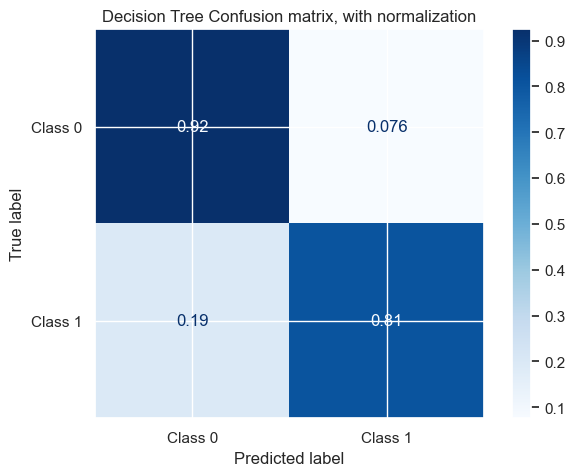

In [95]:
disp = metrics.plot_confusion_matrix(dtc, test_feature_set.astype('float32'), y_test.astype('float32'),
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Decision Tree Confusion matrix, with normalization');

# Stopwords removal and stemming:

In [96]:
sw = set(stopwords.words("english"))
ps = PorterStemmer()

In [97]:
def text_prep_stop_stem(text):
    #clean text
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    #remove non-letters and lower case
    text = re.sub('[^a-z\s]', '', text.lower())
    
    #remove punctuation        
    punc_removed = [char for char in text if char not in punct]
    punc_removed = ''.join(punc_removed)
    
    #stem and remove stop words
    return [ps.stem(word) for word in punc_removed.split() if not word in sw]
    #return [word for word in punc_removed.split() if not word in sw]

In [98]:
start_time = time.time()
cv= CountVectorizer(binary=True, analyzer = text_prep_stop_stem, min_df = 10, max_df = 0.95)
cv.fit_transform(train['text'].values)
train_feature_set=cv.transform(train['text'].values)
test_feature_set=cv.transform(test['text'].values)
print("Time takes to convert text input into 8feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into 8feature vector:  8.3  mins


In [99]:
train_feature_set.shape[1]

20503

In [100]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  0.3  mins
Accuracy:  0.959
F1:  0.929


In [101]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(train_feature_set,y_train)
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(X_under,y_under)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  0.48  mins
Accuracy:  0.955
F1:  0.925


In [102]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(train_feature_set,y_train)
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(X_over,y_over)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  1.12  mins
Accuracy:  0.957
F1:  0.927


# Trying TFIDF Vectorizer:

In [103]:
start_time = time.time()
tfidf_v=TfidfVectorizer(use_idf=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
tfidf_v.fit_transform(train['text'].values)
train_feature_set=tfidf_v.transform(train['text'].values)
test_feature_set=tfidf_v.transform(test['text'].values)
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  0.83  mins


In [104]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  0.09  mins
Accuracy:  0.967
F1:  0.943


In [105]:
start_time = time.time()
cv = CountVectorizer(binary=True, min_df = 10, max_df = 0.95, ngram_range=(1,2))
cv.fit_transform(train['text'].values)
train_feature_set=cv.transform(train['text'].values)
test_feature_set=cv.transform(test['text'].values)
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  1.41  mins


In [106]:
train_feature_set.shape[1]

335497

In [107]:
cv.vocabulary_

{'amazing': 12205,
 'donuts': 83649,
 'love': 163616,
 'the': 275086,
 'actual': 5356,
 'cake': 51411,
 'great': 119782,
 'customer': 71957,
 'service': 245646,
 'this': 288807,
 'donut': 83603,
 'loving': 164134,
 'girl': 115358,
 'is': 144368,
 'very': 308976,
 'happy': 125589,
 'to': 293212,
 'have': 126693,
 'found': 108026,
 'shop': 248542,
 'amazing donuts': 12356,
 'love the': 163842,
 'the actual': 275267,
 'actual cake': 5360,
 'cake donuts': 51449,
 'donuts great': 83670,
 'great customer': 120012,
 'customer service': 72077,
 'service this': 246229,
 'this donut': 289164,
 'girl is': 115392,
 'is very': 146408,
 'very happy': 309275,
 'happy to': 125707,
 'to have': 294593,
 'have found': 127183,
 'found this': 108151,
 'donut shop': 83636,
 'visiting': 310714,
 'area': 25433,
 'for': 105228,
 'one': 196891,
 'night': 184702,
 'and': 13982,
 'place': 215500,
 'on': 195380,
 'yelp': 332507,
 'so': 253702,
 'ono': 198647,
 'you': 333008,
 'can': 52493,
 'read': 227325,
 'rest'

In [108]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Time takes to train model and make predictions:  1.16  mins
Accuracy:  0.975
F1:  0.957


In [109]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  00 Score:  0.43807610776787764
Feature:  00 00 Score:  0.083375663145133
Feature:  00 30 Score:  0.003239982182878332
Feature:  00 after Score:  0.08904268211810774
Feature:  00 all Score:  0.10563821453591885
Feature:  00 also Score:  0.005724172234355013
Feature:  00 am Score:  -0.13537574784545772
Feature:  00 an Score:  0.0756635008594547
Feature:  00 and Score:  -0.08324269445349196
Feature:  00 appointment Score:  0.04391833245151622


In [110]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['two stars', 'worst', 'at best', 'to love', 'not worth', 'not impressed', 'not recommend', 'horrible', 'awful', 'unprofessional']


In [111]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['not disappointed', 'be disappointed', 'four stars', 'never disappointed', 'excellent', 'delicious', 'amazing', 'phenomenal', 'fantastic', 'best']


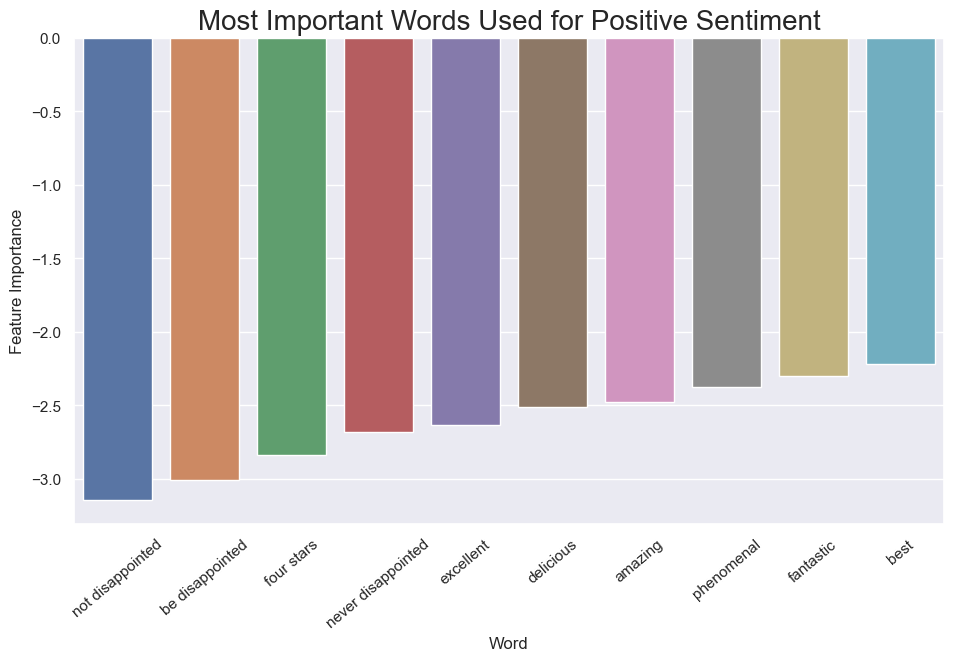

In [112]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [113]:
lr.classes_ #negative class first, positive class next

array([0, 1])

In [114]:
test_review = cv.transform(["I did not enjoy the food or the service"])
lr.predict_proba(test_review)

array([[0.19930489, 0.80069511]])

In [115]:
test_review = cv.transform(["Great ambiance, loved the service"])
lr.predict_proba(test_review)

array([[0.97729023, 0.02270977]])

### Problem 4: Presentation in the class (12 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 12 minutes. All members of a group should share equal responsibility to present. **Points will be taken away if presentation exceeds 12 mins.** 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 12 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_4_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
